# Gaps

In [1]:
import geopandas
import numpy
import matplotlib.pyplot as plt
import geoplanar
from shapely.geometry import box, Polygon


<Axes: >

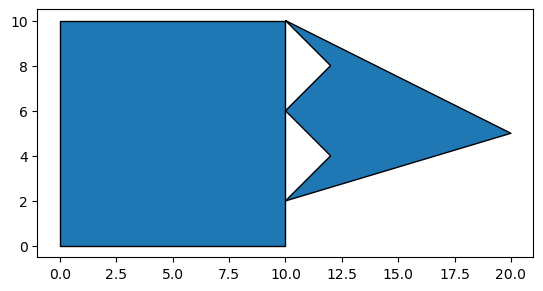

In [2]:
p1 = box(0,0,10,10)
p2 = Polygon([(10,10), (12,8), (10,6), (12,4), (10,2), (20,5)])

gdf = geopandas.GeoDataFrame(geometry=[p1,p2])
gdf.plot(edgecolor='k')

In [3]:
geoplanar.gaps(gdf)

0     POLYGON ((10 2, 10 6, 12 4, 10 2))
1    POLYGON ((10 6, 10 10, 12 8, 10 6))
dtype: geometry

In [4]:
g = geoplanar.gaps(gdf)

In [5]:
g.area.values

array([4., 4.])

In [6]:
gdf1 = geoplanar.fill_gaps(gdf)

<Axes: >

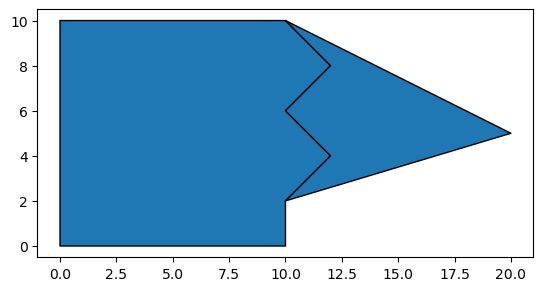

In [7]:
gdf1.plot(edgecolor='k')

In [8]:
gdf1.area

0    108.000032
1     32.000000
dtype: float64

In [9]:
gdf.area

0    100.0
1     32.0
dtype: float64

In [10]:
geoplanar.gaps(gdf1)

GeoSeries([], dtype: geometry)

The default is to merge the gap with the largest neighboring feature. 

To merge the gap with the smallest neighboring feature strategy='smallest':

<Axes: >

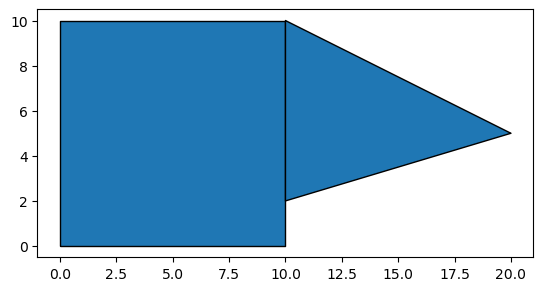

In [11]:
geoplanar.fill_gaps(gdf, strategy='smallest').plot(edgecolor='k')

In [12]:
geoplanar.fill_gaps(gdf, strategy='smallest').area

0    99.999992
1    40.000030
dtype: float64

## Maximizing compactness when filling gaps

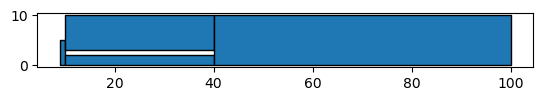

In [13]:
p1 = box(9,0,10,5)
p2 = box(10,0, 40,2)
p3 = box(10,3, 40,10)
p4 = box(40,0, 100, 10)
gdf = geopandas.GeoDataFrame(geometry=[p1,p2, p3, p4])
gdf.plot(edgecolor='k');


The default will result in attaching the gap to the largest polygon:

<bound method Axes.plot of <Axes: >>

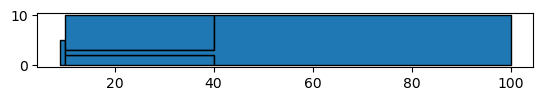

In [14]:
geoplanar.fill_gaps(gdf).plot(edgecolor='k').plot

Attaching to the smallest candidate polygon also results in a non-compact polygon.

<bound method Axes.plot of <Axes: >>

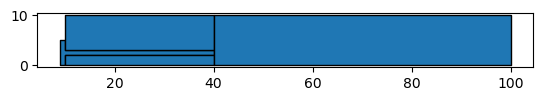

In [15]:
geoplanar.fill_gaps(gdf,strategy='smallest').plot(edgecolor='k').plot

Setting `strategy="compact"` will instead add the gap to the candidate polygon that results in the new polygon with the highest compactness (measured by the isoperimetric quotient).

<Axes: >

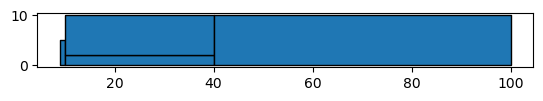

In [16]:
geoplanar.fill_gaps(gdf, strategy='compact').plot(edgecolor='k')

## Checking edge case

<Axes: >

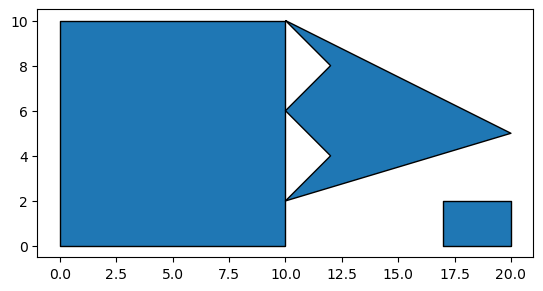

In [17]:
p1 = box(0,0,10,10)
p2 = Polygon([(10,10), (12,8), (10,6), (12,4), (10,2), (20,5)])
p3 = box(17,0,20,2)

gdf = geopandas.GeoDataFrame(geometry=[p1,p2,p3])
gdf.plot(edgecolor='k')

In [18]:
g = geoplanar.gaps(gdf)

<Axes: >

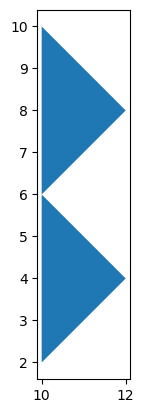

In [19]:
g.plot()

<Axes: >

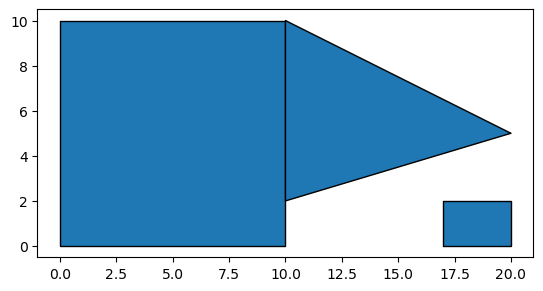

In [20]:
geoplanar.fill_gaps(gdf, strategy='smallest').plot(edgecolor='k')

<Axes: >

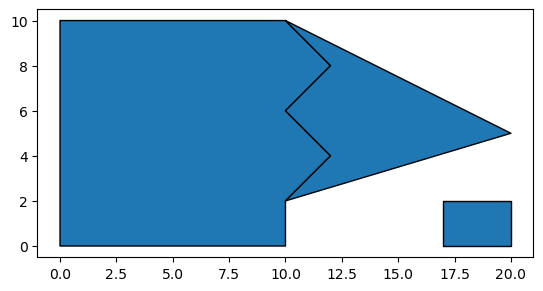

In [21]:
geoplanar.fill_gaps(gdf, strategy='largest').plot(edgecolor='k')

<Axes: >

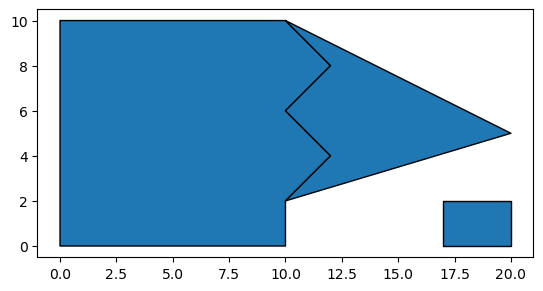

In [22]:
geoplanar.fill_gaps(gdf, strategy=None).plot(edgecolor='k')

<Axes: >

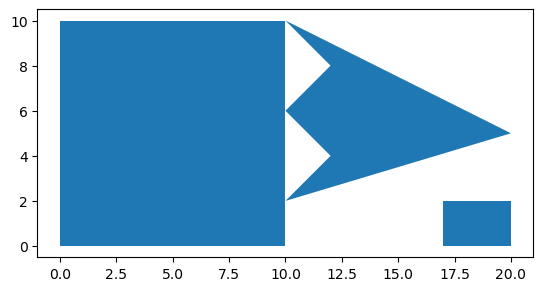

In [23]:
gdf.plot()

## Gap with an inlet (non-gap)

<Axes: >

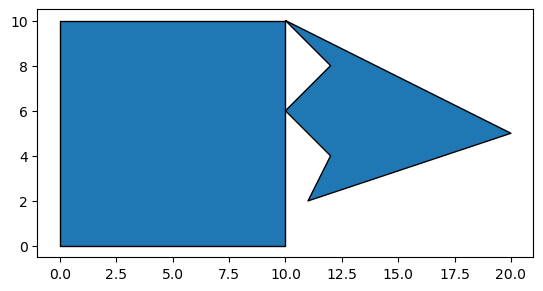

In [24]:
p1 = box(0,0,10,10)
p2 = Polygon([(10,10), (12,8), (10,6), (12,4), (11,2), (20,5)])

# a true gap with a inlet
gdf = geopandas.GeoDataFrame(geometry=[p1,p2])
gdf.plot(edgecolor='k')

In [25]:
geoplanar.gaps(gdf)

0    POLYGON ((10 6, 10 10, 12 8, 10 6))
dtype: geometry

<Axes: >

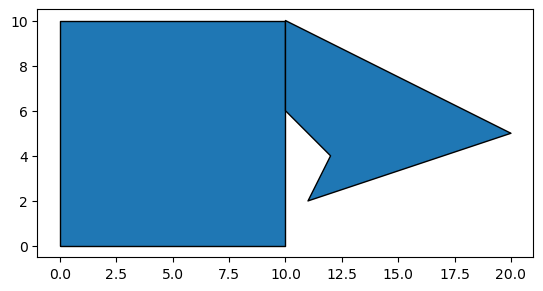

In [26]:
geoplanar.fill_gaps(gdf, strategy='smallest').plot(edgecolor='k')

<Axes: >

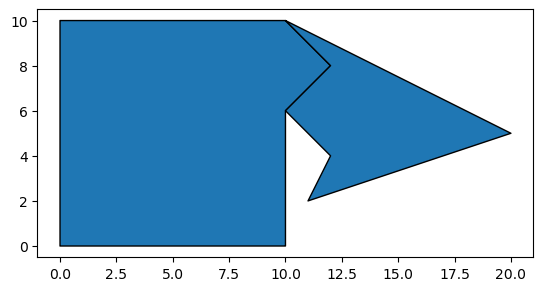

In [27]:
geoplanar.fill_gaps(gdf, strategy='largest').plot(edgecolor='k')

## Selective Correction

<Axes: >

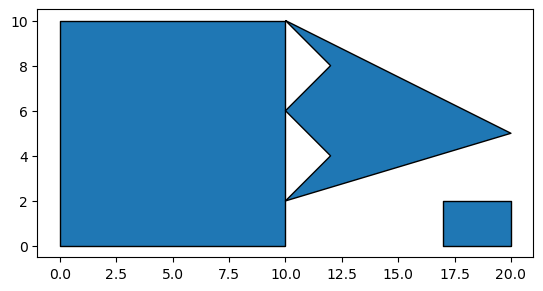

In [28]:
p1 = box(0,0,10,10)
p2 = Polygon([(10,10), (12,8), (10,6), (12,4), (10,2), (20,5)])
p3 = box(17,0,20,2)

gdf = geopandas.GeoDataFrame(geometry=[p1,p2,p3])
gdf.plot(edgecolor='k')

In [29]:
gaps = geoplanar.gaps(gdf)

<Axes: >

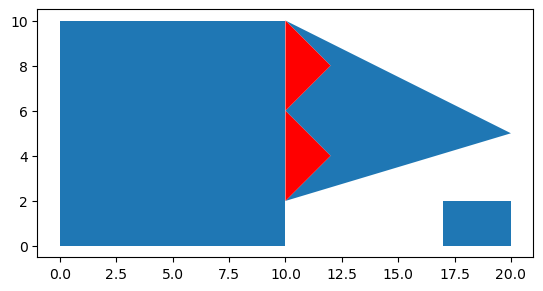

In [30]:
base = gdf.plot()
gaps.plot(color='red', ax=base)

In [31]:
gaps

0     POLYGON ((10 2, 10 6, 12 4, 10 2))
1    POLYGON ((10 6, 10 10, 12 8, 10 6))
dtype: geometry

In [32]:
g2 = gaps.loc[[1]]

In [33]:
g2

1    POLYGON ((10 6, 10 10, 12 8, 10 6))
dtype: geometry

In [34]:
filled = geoplanar.fill_gaps(gdf,g2)

<Axes: >

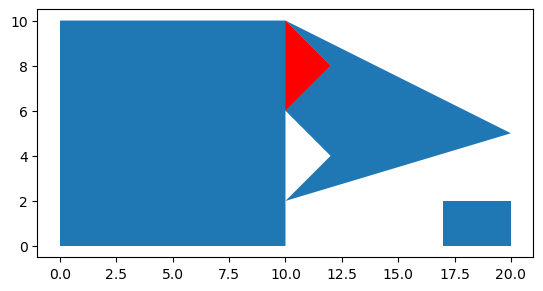

In [35]:
base = filled.plot()
g2.plot(color='red', ax=base)

In [36]:
filled.area

0    104.000036
1     32.000000
2      6.000000
dtype: float64

In [37]:
filled.shape

(3, 1)

In [38]:
(filled.area==[104, 32,6]).all()

np.False_

## gap coincindent with > 2 polygons

<Axes: >

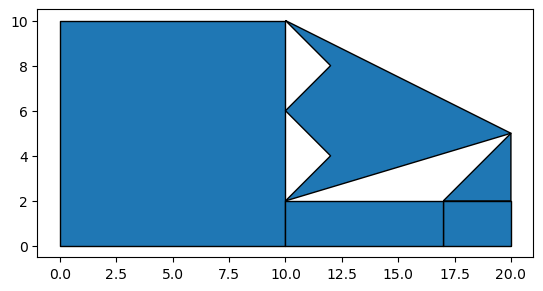

In [39]:
p1 = box(0,0,10,10)
p2 = Polygon([(10,10), (12,8), (10,6), (12,4), (10,2), (20,5)])
p3 = box(17,0,20,2)
p4 = box(10,0, 17, 2)
p5 = Polygon([(17, 2), (20,5), (20, 2), (17,2)])

gdf = geopandas.GeoDataFrame(geometry=[p1,p2,p3, p4, p5])
gdf.plot(edgecolor='k')

<Axes: >

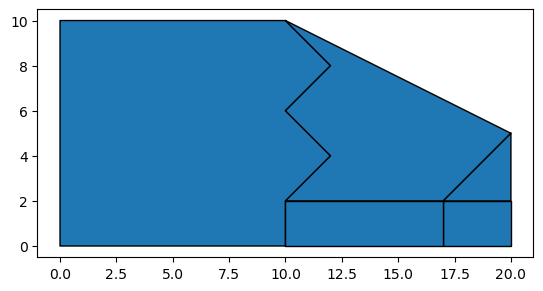

In [40]:
g = geoplanar.gaps(gdf)
gl = geoplanar.fill_gaps(gdf, strategy='largest')
gl.plot(edgecolor='k')

<Axes: >

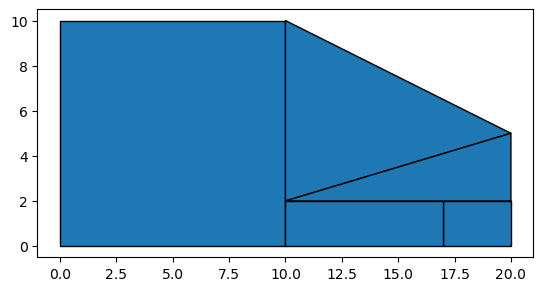

In [41]:
gr = geoplanar.fill_gaps(gdf, strategy='smallest')
gr.plot(edgecolor='k')

<Axes: >

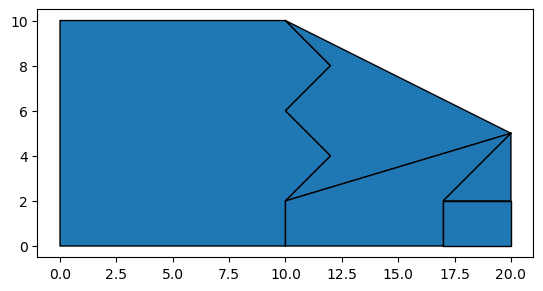

In [42]:
gr = geoplanar.fill_gaps(gdf, strategy=None)
gr.plot(edgecolor='k')

In [43]:
gl.geometry

0    MULTIPOLYGON (((10 -1.9509e-7, 10 -3.82683e-7,...
1    POLYGON ((10 2, 10 2, 10 2, 10 2, 10 2, 10 2, ...
2             POLYGON ((20 0, 20 2, 17 2, 17 0, 20 0))
3             POLYGON ((17 0, 17 2, 10 2, 10 0, 17 0))
4                   POLYGON ((17 2, 20 5, 20 2, 17 2))
Name: geometry, dtype: geometry

In [44]:
gr.geometry

0    POLYGON ((10 2, 10 2, 10 2, 10 2, 10 2, 10 2, ...
1    POLYGON ((10 6, 12 8, 10 10, 20 5, 19.99999 5,...
2             POLYGON ((20 0, 20 2, 17 2, 17 0, 20 0))
3    POLYGON ((17 -7.07107e-7, 17 -8.3147e-7, 17 -9...
4                   POLYGON ((17 2, 20 5, 20 2, 17 2))
Name: geometry, dtype: geometry

In [45]:
gdf.geometry

0             POLYGON ((10 0, 10 10, 0 10, 0 0, 10 0))
1    POLYGON ((10 10, 12 8, 10 6, 12 4, 10 2, 20 5,...
2             POLYGON ((20 0, 20 2, 17 2, 17 0, 20 0))
3             POLYGON ((17 0, 17 2, 10 2, 10 0, 17 0))
4                   POLYGON ((17 2, 20 5, 20 2, 17 2))
Name: geometry, dtype: geometry

<Axes: >

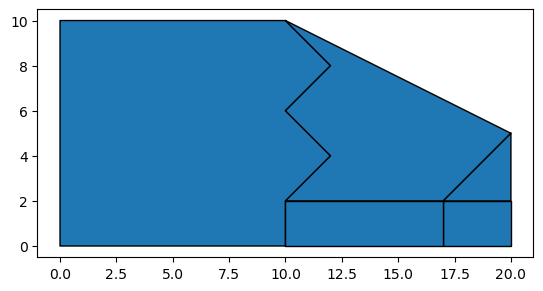

In [46]:
gc = geoplanar.fill_gaps(gdf, strategy='compact')
gc.plot(edgecolor='k')